In [3]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import AgglomerativeClustering,KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

In [ ]:
pip install ImageHash

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 46.9 MB/s eta 0:00:00


In [ ]:
def remove_duplicates_hashing(images, labels, hash_size=8):
    """Removes duplicate images using image hashing.

    Args:
      images: A NumPy array of images.
      labels: A NumPy array of labels.
      hash_size: The size of the image hash.

    Returns:
      A tuple containing the deduplicated images and labels.
    """

    hashes = []
    unique_indices = []
    for i, img in enumerate(images):
        hash = imagehash.average_hash(tf.keras.preprocessing.image.array_to_img(img), hash_size=hash_size)
        if hash not in hashes:
            hashes.append(hash)
            unique_indices.append(i)

    return images[unique_indices], labels[unique_indices]

# Remove duplicates from the training set
x_train_dedup, y_train_dedup = remove_duplicates_hashing(x_train, y_train)

# Remove duplicates from the test set
x_test_dedup, y_test_dedup = remove_duplicates_hashing(x_test, y_test)

print("Original x_train shape:", x_train.shape)
print("Deduplicated x_train shape:", x_train_dedup.shape)
print("Original x_test shape:", x_test.shape)
print("Deduplicated x_test shape:", x_test_dedup.shape)

Original x_train shape: (50000, 32, 32, 3)
Deduplicated x_train shape: (49353, 32, 32, 3)
Original x_test shape: (10000, 32, 32, 3)
Deduplicated x_test shape: (9931, 32, 32, 3)


In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()


In [4]:
print("Original x_train shape:", x_train.shape)
print("Original x_test shape:", x_test.shape)


Original x_train shape: (50000, 32, 32, 3)
Original x_test shape: (10000, 32, 32, 3)


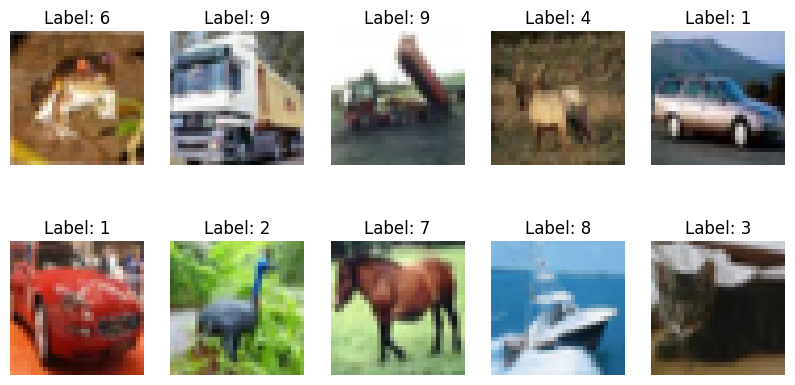

In [5]:
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_train[i])
    plt.title(f"Label: {y_train[i][0]}")
    plt.axis('off')
plt.show()

In [13]:
# Data Processing
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
x_train_flat = x_train.reshape(x_train.shape[0], -1)
x_test_flat = x_test.reshape(x_test.shape[0], -1)

In [14]:
# Standardize
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train_flat)
x_test_scaled = scaler.transform(x_test_flat)


In [ ]:
# K-means

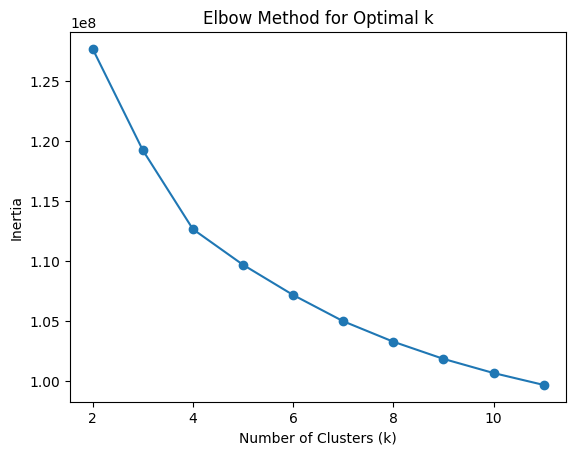

In [ ]:
inertia = []
for k in range(2, 12):  # k from 2 to 11
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(x_train_scaled)
    inertia.append(kmeans.inertia_)
plt.plot(range(2, 12), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

In [21]:
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans_labels_train = kmeans.fit_predict(x_train_scaled)
kmeans_labels_test = kmeans.predict(x_test_scaled)

In [22]:
silhouette_avg = silhouette_score(x_test_scaled, kmeans_labels_test)
print(f"Silhouette Score: {silhouette_avg}")


Silhouette Score: 0.10076520591974258


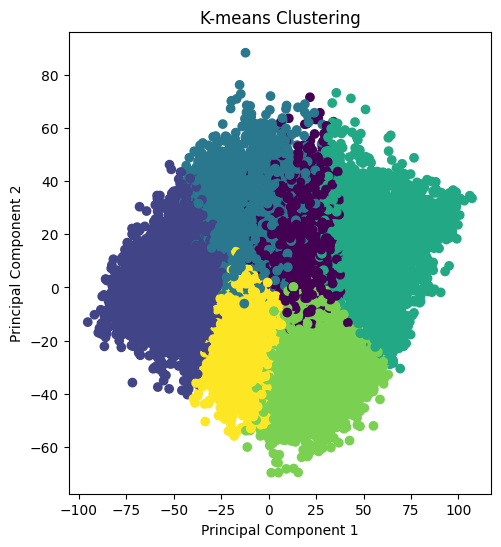

In [ ]:
pca = PCA(n_components=2)
x_train_pca = pca.fit_transform(x_train_scaled)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(x_train_pca[:, 0], x_train_pca[:, 1], c=kmeans_labels_train, cmap="viridis")
plt.title("K-means Clustering")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")

plt.show()